# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. Deep Q-network algorithm implementaion for submission

This part contains an implementation of Deep Q-Network algorithm, for referecne see [here](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf).

<p><img src="dqn_algo.png" width="500" align="left"/></p>

### Helper code for running env

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def run_episode(agent, train_mode=True):
    """
    A hepler function for running single episode
    """
    
    env_info = env.reset(train_mode=train_mode)[brain_name] 
    state = env_info.vector_observations[0]                 
    score = 0                                               
    
    while True:
        action = agent.act(state)                           
        env_info = env.step(action)[brain_name]             
        next_state = env_info.vector_observations[0]        
        reward = env_info.rewards[0]                        
        done = env_info.local_done[0]                       
        agent.update(state, action, reward, next_state, done)
        score += reward                                     
        state = next_state                                  
        if done:                                            
            break
    agent.reset_episode()
    return score

def run_episodes_and_display(agent, n_episodes=1000):
    """
    Runs a series of episode and display agent's performance
    """
    
    display_step = 100
    score = 0
    score_sum = 0
    scores = []
    for episode in range(1, n_episodes+1):
        score = run_episode(agent, train_mode=True)
        score_sum += score
        scores.append(score)
        if episode%display_step==0:
            avg_score = score_sum/display_step
            print("Episode: {}. Average score: {}".format(episode, avg_score))
            score_sum = 0
            
            if avg_score > 13:
                print("Environment is solved! Average score over 100 episodes > 13.")
                break
            
    fig = plt.figure()
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Max Score')
    plt.xlabel('Episode #')
    plt.show()

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    """
    Simple multilayer network for DQN agent
    """

    def __init__(self, state_size, action_size, seed, hidden_size1=64, hidden_size2=64):
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.layer1 = nn.Linear(state_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, action_size)

    def forward(self, state):
        x = F.relu(self.layer1(state))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [9]:
import torch.optim as optim
from collections import deque
import random


BATCH_SIZE = 32
UPDATE_STEP = 4
BUFFER_SIZE = 100000
LEARNING_RATE = 5e-4
GAMMA = 0.9
EPS_START = 1
EPS_END = 0.1
EPS_DECAY = 0.995
TAU=1e-3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Running on device: {}".format(device))

class DQNAgent:
    """ An agent implementing Deep Q-Network algorithm"""
    
    def __init__(self, state_size, action_size, seed=42):
        """Initializes an Agent.
        
        Params:
        -------
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LEARNING_RATE)
        self.action_size = action_size
        self.buffer = deque(maxlen=BUFFER_SIZE) 
        self.step = 0
        self.eps = EPS_START
        
    def reset_episode(self):
        """
        Resets episode and update epsilon decay
        """
        self.eps = max(EPS_END, EPS_DECAY*self.eps) 
        
    def learn(self):
        """
        Learns values-actions network
        
        """
        
        # Sample batch from replay buffer
        states, next_states, actions, rewards, dones = self.sample_batch()
        
        values = self.qnetwork_target.forward(next_states).detach()
        targets = rewards + GAMMA * values.max(1)[0].view(dones.size()) * (1 - dones)
        outputs = self.qnetwork_local.forward(states).gather(1, actions.long())
        self.optimizer.zero_grad()
        loss = F.mse_loss(outputs, targets)
        loss.backward()
        self.optimizer.step()
    
    
    def update(self, state, action, reward, next_state, done):
        """
        Makes an update step of algorithm and append sars to buffer replay
        
        Params:
        -------
        state - current state
        action - action made
        reward - reward for an action
        next_state - next state from env
        done - episode finishing flag
        """
        self.buffer.append((state, next_state, action, reward, float(done)))
        
        self.step = (self.step+1)%UPDATE_STEP
        if self.step == 0:
            if len(self.buffer) > BATCH_SIZE:
                self.learn()
                self.reset_target_network()
        
    def reset_target_network(self):
        """
        Resets params of target network to values from local network
        """
        params = zip(self.qnetwork_target.parameters(), self.qnetwork_local.parameters())
        for target_param, local_param in params:
            updated_params = TAU*local_param.data + (1-TAU)*target_param.data
            target_param.data.copy_(updated_params)
        
        
    def act(self, state):
        """
        Selects action from state if epsilon-greedy way
        
        Params:
        state - current state
        
        """
        self.step+=1
        
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(torch.from_numpy(state).float().to(device))  
        self.qnetwork_local.train()
            
        if random.random() > self.eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))
        
    def sample_batch(self):
        """
        Samples a batch of experience from replay buffer random uniformily
        """
        batch = random.sample(self.buffer, k=BATCH_SIZE)
        f = lambda arr: torch.from_numpy(np.vstack(arr)).float().to(device)
        states, next_states, actions, rewards, dones = map(f, zip(*batch))
        return states, next_states, actions, rewards, dones 

Running on device: cpu


Episode: 100. Average score: 1.02
Episode: 200. Average score: 3.96
Episode: 300. Average score: 6.98
Episode: 400. Average score: 10.09
Episode: 500. Average score: 12.55
Episode: 600. Average score: 11.75
Episode: 700. Average score: 12.74
Episode: 800. Average score: 12.63
Episode: 900. Average score: 13.58
Environment is solved! Average score over 100 episodes > 13.


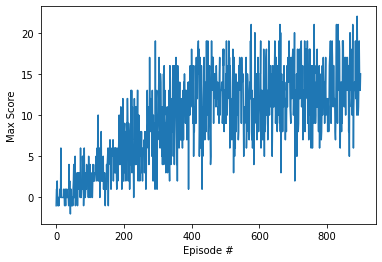

In [10]:
dqn_agent = DQNAgent(state_size, action_size)
run_episodes_and_display(dqn_agent, n_episodes=1000)

In [11]:
run_episode(dqn_agent, train_mode=False)

18.0

In [12]:
torch.save(dqn_agent.qnetwork_local.state_dict(), "./qnetwork_local.pt")
torch.save(dqn_agent.qnetwork_target.state_dict(), "./qnetwork_target.pt")

### Optional part: DQN with prioritized replay buffer

In [20]:
# Priority sampling hyperparams
E = 1e-5
ALPHA = 0.95
BETA = 0.95


class DQNPRAgent(DQNAgent):
    
    def __init__(self, state_size, action_size, seed=42):
        super().__init__(state_size, action_size, seed)
        self.priority = deque(maxlen=BUFFER_SIZE)

        
    def learn(self):
        """
        Learns values-actions network
        
        """
        
        states, next_states, actions, rewards, dones, weights = self.sample_batch()
        values = self.qnetwork_target.forward(next_states).detach()
        targets = rewards + GAMMA * values.max(1)[0].view(dones.size()) * (1 - dones)
        outputs = self.qnetwork_local.forward(states).gather(1, actions.long())
        self.optimizer.zero_grad()
        loss = torch.sum(weights * (outputs - targets) ** 2)
        loss.backward()
        self.optimizer.step()
    
    
    def update(self, state, action, reward, next_state, done):
        """
        Makes an update step of algorithm and append sars to buffer replay
        
        Params:
        -------
        state - current state
        action - action made
        reward - reward for an action
        next_state - next state from env
        done - episode finishing flag
        """
        priority = self.get_priority(state, next_state, action, reward, float(done))
        self.buffer.append((state, next_state, action, reward, float(done), priority))
        
        self.step = (self.step+1)%UPDATE_STEP
        if self.step == 0:
            if len(self.buffer) > BATCH_SIZE:
                self.learn()
                self.reset_target_network()
        
    def sample_batch(self): 
        """
        Samples batch of replay experience with priority
        """
        distr = np.array(list(map(lambda x: x[-1], self.buffer)))
        batch = random.choices(self.buffer, weights=distr, k=BATCH_SIZE)
        f = lambda arr: torch.from_numpy(np.vstack(arr)).float()
        states, next_states, actions, rewards, dones, priorities = map(f, zip(*batch))
        probs = priorities**ALPHA/sum(distr**ALPHA)
        weights = 1/(BUFFER_SIZE*probs)**BETA
        weights = weights/weights.max()
        return states, next_states, actions, rewards, dones, weights
    
    def get_priority(self, state, next_state, action, reward, done):
        """
        Computes priority of a given expirience tuple
        """
        with torch.no_grad():
            value = self.qnetwork_target.forward(torch.from_numpy(next_state).float()).detach()
            target = reward + GAMMA * value.max() * (1 - done)
            output = self.qnetwork_local.forward(torch.from_numpy(state).float())[action]
        return torch.abs(target - output).detach().numpy() + E

Episode: 100. Average score: 0.46
Episode: 200. Average score: 3.04
Episode: 300. Average score: 6.59
Episode: 400. Average score: 9.55
Episode: 500. Average score: 12.56


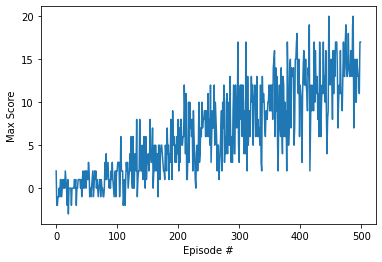

In [21]:
dqnpr_agent = DQNPRAgent(state_size, action_size)
run_episodes_and_display(dqnpr_agent, n_episodes=500)

In [22]:
env.close()